In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import LinearSVC, SVC

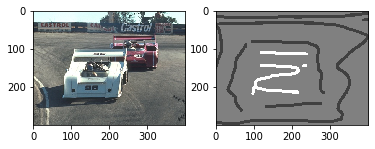

In [35]:
image = 'flower.bmp'
image = '21077.bmp'
img = cv2.imread('../Datasets/SegmentacionImagenes/images/'+image)
bordes = cv2.imread('../Datasets/SegmentacionImagenes/bordes_mr/'+image)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
bordes = cv2.cvtColor(bordes,cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(bordes)
plt.show()

In [36]:
print(img.shape)
print(bordes.shape)
nrows,ncols,nch = img.shape
# Vectorizar las imágenes
Ximg = np.reshape(img,(nrows*ncols,3))
Xbordes = np.reshape(bordes,(nrows*ncols,3))
print('Ximg',Ximg.shape)
print('Xbordes',Xbordes.shape)

(300, 400, 3)
(300, 400, 3)
Ximg (120000, 3)
Xbordes (120000, 3)


In [37]:
Xbordes = Xbordes[:,0]
print(np.unique(Xbordes,return_counts=True))

(array([ 64, 128, 255], dtype=uint8), array([17639, 98282,  4079], dtype=int64))


In [38]:
Xobj = Ximg[ Xbordes==255 ]
Xfod = Ximg[ Xbordes==64 ]
print('Xobj',Xobj.shape)
print('Xfod',Xfod.shape)
print(Xobj)

Xobj (4079, 3)
Xfod (17639, 3)
[[149 180 174]
 [138 169 164]
 [133 165 162]
 ...
 [ 93 121 133]
 [ 97 125 136]
 [ 93 121 132]]


In [39]:
Yobj = np.ones( (Xobj.shape[0]))*255
Yfod = np.zeros( (Xfod.shape[0]))
print('Yobj',len(Yobj),Yobj)
print('Yfod',len(Yfod),Yfod)

Yobj 4079 [255. 255. 255. ... 255. 255. 255.]
Yfod 17639 [0. 0. 0. ... 0. 0. 0.]


In [40]:
# Datos de entrenamiento
X = np.concatenate( (Xobj,Xfod),axis=0)
Y = np.concatenate( (Yobj,Yfod),axis=0)

In [41]:
# Modelo de SVM

model = LinearSVC()
model.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [42]:
res = model.predict(Ximg)
print(len(res))

120000


In [43]:
imgres = np.reshape(res,(nrows,ncols))

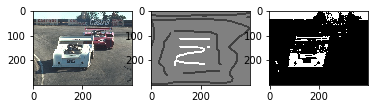

In [44]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(bordes)
plt.subplot(1,3,3)
plt.imshow(imgres,cmap='gray')
plt.show()

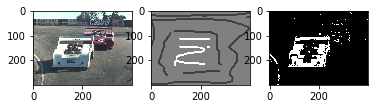

In [45]:
model = SVC()
model.fit(X,Y)
res = model.predict(Ximg)
imgres = np.reshape(res,(nrows,ncols))
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(bordes)
plt.subplot(1,3,3)
plt.imshow(imgres,cmap='gray')
plt.show()